<a href="https://colab.research.google.com/github/ayeshaeva100/Simulation-and-Modeling-Lab/blob/main/Assignment6_2215151159.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ID-2215151159**

**Monte Carlo Simulation:**

a) Simulating 60 weeks, what is the estimated average order size?

b) Based on the simulation, what is the average total cost of "having" the product?


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [4]:
# Data for inventory and probabilities
stock_levels = [15, 25, 35, 40, 42, 55]
stock_probs = [0.12, 0.25, 0.35, 0.20, 0.06, 0.02]

simulation_duration = 60
order_frequency = 2
number_of_orders = simulation_duration // order_frequency

cost_per_order = 50
cost_per_unit = 4
weekly_holding_cost = 1
max_stock = 100

order_quantities = []
cost_records = []

for _ in range(number_of_orders):
    # Sample current inventory level at ordering time
    current_stock = random.choices(stock_levels, stock_probs)[0]

    # Calculate quantity to order to restock up to max_stock
    quantity_ordered = max_stock - current_stock

    # Calculate costs
    ordering_expense = cost_per_order + quantity_ordered * cost_per_unit

    # Inventory is held for 'order_frequency' weeks before next order arrives
    inventory_holding_expense = current_stock * weekly_holding_cost * order_frequency

    # Total expense for this ordering cycle
    total_expense = ordering_expense + inventory_holding_expense

    # Collect data
    order_quantities.append(quantity_ordered)
    cost_records.append(total_expense)

average_order_quantity = sum(order_quantities) / number_of_orders
average_cycle_cost = sum(cost_records) / number_of_orders

print(f"(a) Average order quantity over {simulation_duration} weeks (order every {order_frequency} weeks): {average_order_quantity:.2f} units")
print(f"(b) Average total cost per ordering cycle: ${average_cycle_cost:.2f}")


(a) Average order quantity over 60 weeks (order every 2 weeks): 72.70 units
(b) Average total cost per ordering cycle: $395.40


**Single-Server Queue Simulations**

1: Perform a simulation for 200 customers with λ=3and μ=4. Calculate and compare the waiting time and server utilization.

Simulation for 200 customers with λ = 3 and μ = 4:
Average Waiting Time: 0.46 time units
Server Utilization: 72.95%


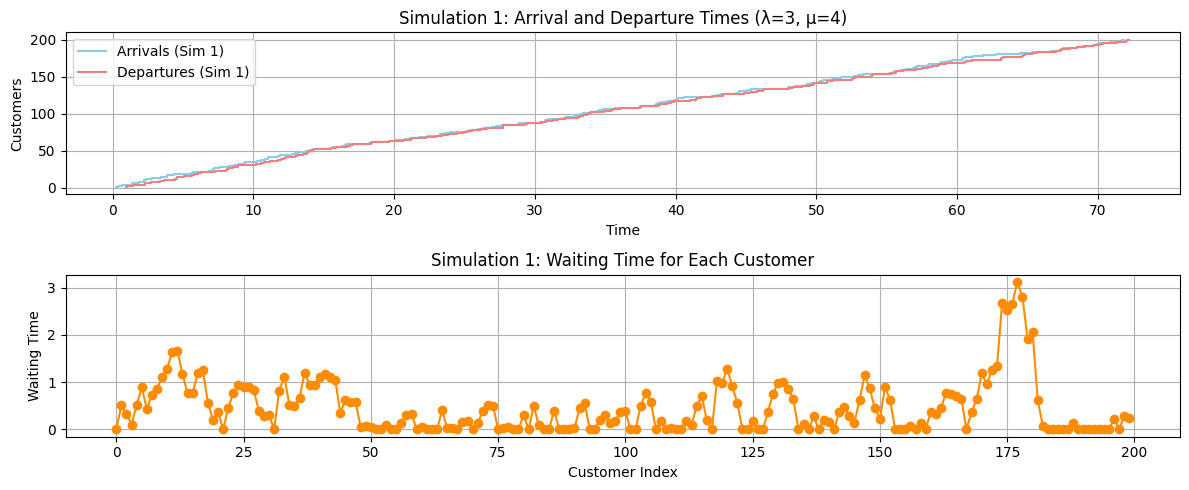

In [6]:
lambda_rate = 3
mu_rate = 4
n_customers = 200


inter_arrival_times = np.random.exponential(1 / lambda_rate, n_customers)
service_times = np.random.exponential(1 / mu_rate, n_customers)
arrival_times = np.cumsum(inter_arrival_times)


start_times = np.zeros(n_customers)
end_times = np.zeros(n_customers)

start_times[0] = arrival_times[0]
end_times[0] = start_times[0] + service_times[0]

for i in range(1, n_customers):
    start_times[i] = max(arrival_times[i], end_times[i - 1])
    end_times[i] = start_times[i] + service_times[i]

#Calculate performance metrics
waiting_times = start_times - arrival_times
server_utilization = np.sum(service_times) / end_times[-1]
avg_waiting_time = np.mean(waiting_times)

print(f"Simulation for {n_customers} customers with λ = {lambda_rate} and μ = {mu_rate}:")
print(f"Average Waiting Time: {avg_waiting_time:.2f} time units")
print(f"Server Utilization: {server_utilization * 100:.2f}%")

plt.figure(figsize=(12,5))
plt.subplot(2,1,1)
plt.step(arrival_times, np.arange(1, n_customers+1), label='Arrivals (Sim 1)', where='post', color='skyblue')
plt.step(end_times, np.arange(1, n_customers+1), label='Departures (Sim 1)', where='post', color='lightcoral')
plt.xlabel('Time')
plt.ylabel('Customers')
plt.legend()
plt.grid(True)
plt.title(f'Simulation 1: Arrival and Departure Times (λ={lambda_rate}, μ={mu_rate})') # Include rates in title

plt.subplot(2,1,2)
plt.plot(range(n_customers), waiting_times, 'o-', label='Waiting Time (Sim 1)', color='darkorange')
plt.xlabel('Customer Index')
plt.ylabel('Waiting Time')
plt.grid(True)
plt.title('Simulation 1: Waiting Time for Each Customer')
plt.tight_layout()
plt.show()



 2:Simulate a system with λ=8 and μ=6. Discuss the impact of server overload on system performance.

Scenario 2 (λ = 8, μ = 6 - Overload):
Average Waiting Time: 5.95 units
Server Utilization: 99.02%


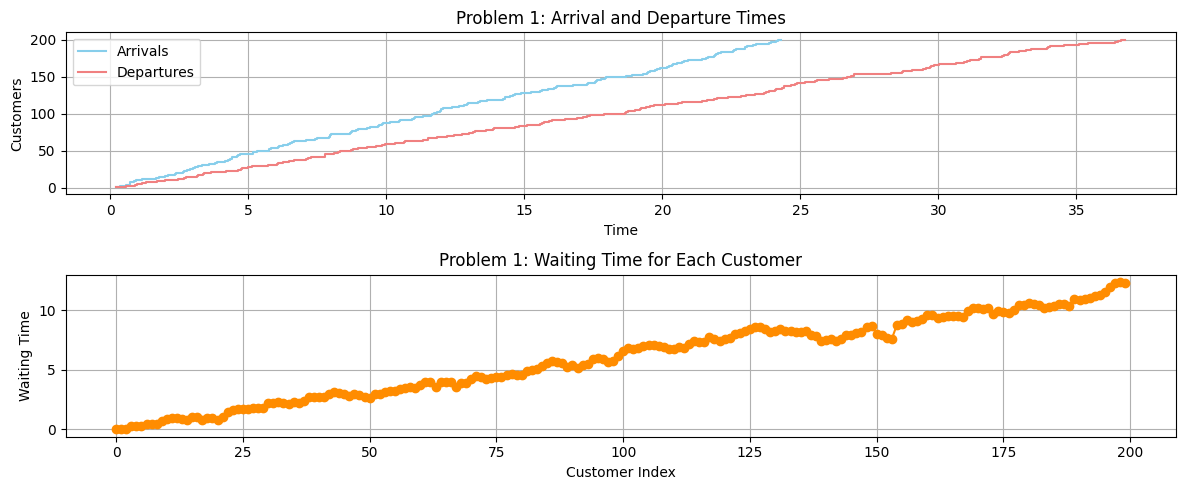

In [9]:

lambda_rate = 8
mu_rate = 6
n_customers = 200


inter_arrival_times = np.random.exponential(1 / lambda_rate, n_customers)
service_times = np.random.exponential(1 / mu_rate, n_customers)
arrival_times = np.cumsum(inter_arrival_times)

start_times = np.zeros(n_customers)
end_times = np.zeros(n_customers)


start_times[0] = arrival_times[0]
end_times[0] = start_times[0] + service_times[0]

for i in range(1, n_customers):
    start_times[i] = max(arrival_times[i], end_times[i - 1])
    end_times[i] = start_times[i] + service_times[i]

waiting_times = start_times - arrival_times
avg_waiting_time = np.mean(waiting_times)
server_utilization = np.sum(service_times) / end_times[-1]

print(f"Scenario 2 (λ = {lambda_rate}, μ = {mu_rate} - Overload):")
print(f"Average Waiting Time: {avg_waiting_time:.2f} units")
print(f"Server Utilization: {server_utilization * 100:.2f}%")

plt.figure(figsize=(12,5))
plt.subplot(2,1,1)

plt.step(arrival_times, np.arange(1, n_customers+1), label='Arrivals', where='post', color='skyblue')
plt.step(end_times, np.arange(1, n_customers+1), label='Departures', where='post', color='lightcoral')
plt.xlabel('Time')
plt.ylabel('Customers')
plt.legend()
plt.grid(True)
plt.title('Problem 1: Arrival and Departure Times')

plt.subplot(2,1,2)
plt.plot(range(n_customers), waiting_times, 'o-', label='Waiting Time', color='darkorange')
plt.xlabel('Customer Index')
plt.ylabel('Waiting Time')
plt.grid(True)
plt.title('Problem 1: Waiting Time for Each Customer')
plt.tight_layout()
plt.show()

3: Modify the program to include a limited queue capacity (e.g., maximum 10 customers).Analyze how this affects the performance metrics.


--- Limited Queue Capacity (Max 10) ---
Accepted Customers: 178
Rejected Customers: 22
Average Waiting Time: 2.89 units
Server Utilization: 92.12%


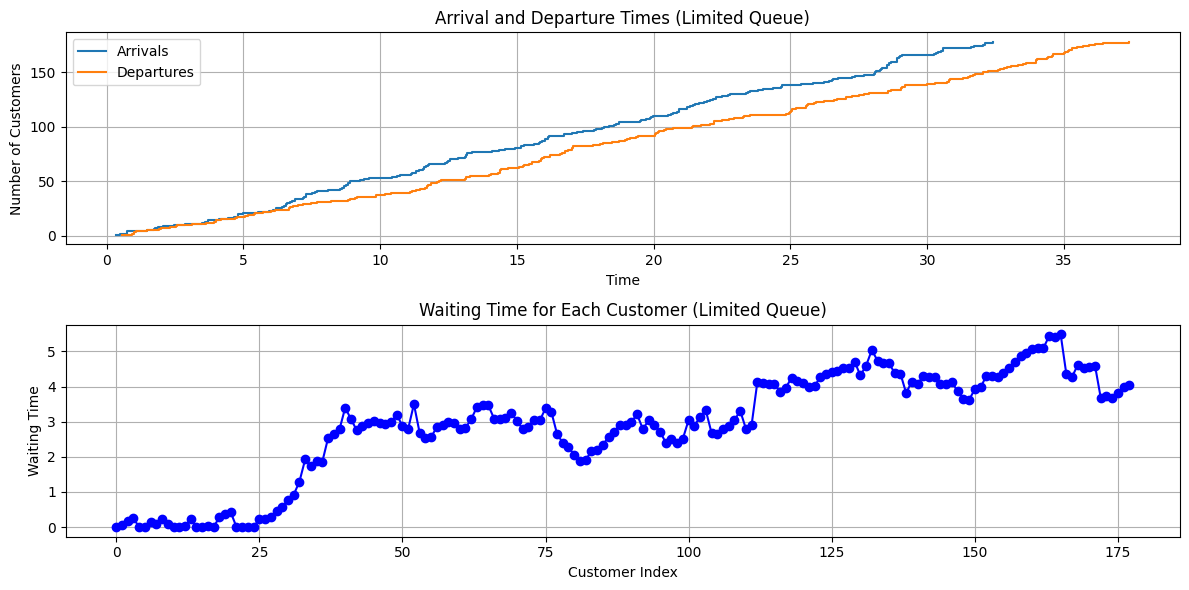

In [14]:
lambda_rate = 6
mu_rate = 5
max_queue_size = 10

inter_arrival_times = np.random.exponential(1/lambda_rate, n_customers)
service_times = np.random.exponential(1/mu_rate, n_customers)
arrival_times = np.cumsum(inter_arrival_times)

start_times = []
end_times = []
accepted = 0
rejected = 0
last_end_time = 0
queue = []

for i in range(n_customers):
    arrival = arrival_times[i]
    queue = [end for end in queue if end > arrival]  # Clean up finished

    if len(queue) < max_queue_size:
        start = max(arrival, last_end_time)
        end = start + service_times[i]
        start_times.append(start)
        end_times.append(end)
        last_end_time = end
        queue.append(end)
        accepted += 1
    else:
        rejected += 1

waiting_times = np.array(start_times) - arrival_times[:accepted]
server_utilization = np.sum(service_times[:accepted]) / end_times[-1]

print("\n--- Limited Queue Capacity (Max 10) ---")
print("Accepted Customers:", accepted)
print("Rejected Customers:", rejected)
print(f"Average Waiting Time: {np.mean(waiting_times):.2f} units")
print(f"Server Utilization: {server_utilization*100:.2f}%")

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.step(arrival_times[:accepted], np.arange(1, accepted+1), label='Arrivals', where='post')
plt.step(end_times, np.arange(1, accepted+1), label='Departures', where='post')
plt.xlabel('Time')
plt.ylabel('Number of Customers')
plt.title('Arrival and Departure Times (Limited Queue)')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(range(accepted), waiting_times, 'bo-', label='Waiting Time')
plt.xlabel('Customer Index')
plt.ylabel('Waiting Time')
plt.title('Waiting Time for Each Customer (Limited Queue)')
plt.grid(True)

plt.tight_layout()
plt.show()